本文の流れ
+ 状態空間モデルの導出
    - 車輪型倒立振子の状態方程式の導出
    - モータの動特性の導出
    - システム全体の状態方程式の導出
    - 観測方程式の導出
    - 状態空間モデルの導出
+ 制御器(LQG)の設計
    - システムの可制御性・可観測性の確認
    - カルマンフィルタの設計
    - 状態フィードバックの設計
    - LQG制御器の設計
+ シミュレーション
    - シミュレーションの設定
    - シミュレーションの実行
    - シミュレーション結果の表示
+ 実機のシステム同定
    - 倒立振子の幾何パラメータの同定
    - 駆動系の動特性の同定

# 状態空間モデルの導出

## 車輪型倒立振子の状態方程式の導出
Euler-Lagrangeの運動方程式を用いて、車輪型倒立振子の状態方程式を導出する。

今回は、車輪型倒立振子の座標系・パラメータを以下の図のように設定する。
また、物理パラメータを以下のように表記する。
+ $M_b$：車体の質量
+ $M_w$：車輪の質量
+ $I_b$：車体の重心周りの慣性モーメント
+ $I_w$：車輪の重心周りの慣性モーメント
+ $L$：車体の重心から車輪の重心までの距離
+ $r$：車輪の半径
+ $g$：重力加速度
+ $D_{\phi}$：車軸の粘性抵抗


<img src="wheel_inverted_pendulum_overview.jpg">

### 運動エネルギーの導出
運動エネルギー$T$には、車体の運動エネルギー$T_b$と車輪の運動エネルギー$T_w$がある。

さらに、車体の運動エネルギーは車体の重心の並進運動エネルギー$T_{bv}$と車体の回転運動エネルギー$T_{br}$に分けられる。
同様に、車輪も車輪の重心の並進運動エネルギー$T_{wv}$と車輪の回転運動エネルギー$T_{wr}$に分けられる。

まず、並進運動エネルギーについて考える。

車体の重心の座標$(x_b,y_b)$は、
$$
\begin{aligned}
x_b &= r(\theta + \phi) + L \sin \theta \\
y_b &= r + L \cos \theta
\end{aligned}
$$
である。よって、車体の並進運動エネルギー$T_{bv}$は、
$$
\begin{aligned}
T_{bv} &= \frac{1}{2} M_b \left( \dot{x}_b^2 + \dot{y}_b^2 \right) \\
&= \frac{1}{2} M_b \left\{ \left( r \left[\dot{\theta}+ \dot{\phi}\right] + L \dot{\theta} \cos \theta \right)^2 + \left(- L \dot{\theta} \sin \theta \right)^2 \right\}  \\
&= \frac{1}{2} M_b \left\{ r^2 \left[\dot{\theta}+ \dot{\phi}\right]^2 + 2rL\left[\dot{\theta}+ \dot{\phi}\right]\dot{\theta} \cos \theta + L^2 \dot{\theta}^2 \right\}  \\
\end{aligned}
$$
となる。

また、車輪の重心の座標$(x_w,y_w)$は、
$$
\begin{aligned}
x_w &= r (\theta + \phi) \\
y_w &= r
\end{aligned}
$$
である。よって、車輪の並進運動エネルギー$T_{wv}$は、
$$
\begin{aligned}
T_{wv} &= \frac{1}{2} M_w \left( \dot{x}_w^2 + \dot{y}_w^2 \right) \\
&= \frac{1}{2} M_w \left\{ \left( r \left[\dot{\theta}+ \dot{\phi}\right] \right)^2 + 0 \right\}  \\
&=\frac{1}{2} M_w r^2 \left(\dot{\theta}+ \dot{\phi}\right)^2
\end{aligned}
$$
となる。

次に、回転運動エネルギーについて考える。
車体の回転運動エネルギー$T_{br}$は、
$$
T_{br}= \frac{1}{2} I_b \dot{\theta}^2
$$
となる。そして、車輪の回転運動エネルギー$T_{wr}$は、
$$
\begin{aligned}
T_{wr}&= \frac{1}{2} I_w \left(\dot{\phi} + \dot{\theta} \right)^2 
\end{aligned}
$$
となる。

以上より、運動エネルギー$T$は、
$$
\begin{aligned}
T &= T_{bv} + T_{wv} + T_{br} + T_{wr} \\
&= \frac{1}{2}\left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right)^2 \\
&\quad + \frac{1}{2}\left[I_b + L^2M_b\right]\dot{\theta}^2 \\
&\quad +r L  M_b \dot{\theta} \left(\dot{\theta} + \dot{\phi}\right) \cos \theta
\end{aligned}
$$
となる。


### ポテンシャルエネルギーの導出
車体の位置エネルギー$U_b$、車輪の位置エネルギーは、それぞれ
$$
\begin{aligned}
U_b &= M_b g L \cos \theta \\
U_w &= 0
\end{aligned}
$$
である。よって、ポテンシャルエネルギー$U$は、
$$
\begin{aligned}
U &= U_b + U_w \\ 
&= M_b g L \cos \theta
\end{aligned}
$$
である。

### 散逸エネルギーの導出
車軸間の摩擦によってエネルギー損失が生じると仮定する。このとき、散逸エネルギー$F$は、
$$
F = \frac{1}{2} D_{\phi} \dot{\phi}^2
$$
となる。

### Euler-Lagrangeの運動方程式の導出
ラグランジアン$L$は、
$$
\begin{aligned}
L &= T - U\\
&= \frac{1}{2}\left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right)^2 \\
&\quad + \frac{1}{2}\left[I_b + L^2M_b\right]\dot{\theta}^2 \\
&\quad +r L  M_b \dot{\theta} \left(\dot{\theta} + \dot{\phi}\right) \cos \theta- g L M_b  \cos \theta
\end{aligned}
$$
となる。一般化座標$q$、一般化力$\tau$に対するEuler-Lagrangeの運動方程式は、
$$
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{q}} \right) - \frac{\partial L}{\partial q} + \frac{\partial F}{\partial \dot{q}} = \tau
$$
である。$\theta, \phi$に対するEuler-Lagrangeの運動方程式は、
$$
\begin{aligned}
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} + \frac{\partial F}{\partial \dot{\theta}} &= \tau_\theta\\
\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\phi}} \right) - \frac{\partial L}{\partial \phi} + \frac{\partial F}{\partial \dot{\phi}} &= \tau_\phi 
\end{aligned}
$$
である。ここで、$\tau_\theta, \tau_\phi$はそれぞれ、$\theta,\phi$座標系に加わる一般化力である。
まず$\theta$の運動方程式を計算する。
$$
\begin{aligned}
\frac{\partial L}{\partial \dot{\theta}} &= \left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right) + \left[I_b + L^2M_b\right]\dot{\theta} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta\\
&= \left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta \\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}} &= \frac{d}{dt}\left\{\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \cos \theta\right\} \\
&=\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + r L  M_b  \left(2\ddot{\theta} + \ddot{\phi}\right) \cos \theta - r L  M_b  \left(2\dot{\theta} + \dot{\phi}\right) \dot{\theta}\sin \theta\\
\frac{\partial L}{\partial \theta} &= -rL M_b \dot{\theta}^2 \sin \theta  - rLM_b \dot{\phi}\dot{\theta}  \sin \theta + g L M_b  \sin \theta \\
\frac{\partial F}{\partial \dot{\theta}} &= 0 \\
\end{aligned}
$$
である。よって、$\theta$の運動方程式は、
$$
\begin{aligned}
&\left[I_w + I_b + L^2M_b +r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + r L  M_b  \left(2\ddot{\theta} + \ddot{\phi}\right) \cos \theta - r L  M_b  \left(\bcancel{2}\dot{\theta} + \cancel{\dot{\phi}}\right) \dot{\theta}\sin \theta \\
&\quad +  \bcancel{rLM_b \dot{\theta}^2 \sin \theta} + \cancel{rLM_b  \dot{\phi}\dot{\theta}\sin \theta } -g L M_b  \sin \theta = \tau_\theta\\
\therefore &\left[I_b + L^2M_b +I_w + r^2\left(M_b + M_w\right) + 2r LM_b \cos \theta \right]\ddot{\theta} \\ 
&\quad+ \left[I_w + r^2\left(M_b + M_w\right) + rL M_b\cos \theta \right]\ddot{\phi} - r L  M_b  \dot{\theta}^2 \sin \theta - g L M_b  \sin \theta = \tau_\theta \\
\end{aligned}
$$
となる。次に$\phi$の運動方程式を計算する。
$$
\begin{aligned}
\frac{\partial L}{\partial \dot{\phi}} &= \left[I_w + r^2\left(M_b + M_w\right)\right]\left(\dot{\theta} + \dot{\phi}\right) +r L  M_b  \dot{\theta} \cos \theta\\
&= \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \dot{\theta} \cos \theta\\
\frac{d}{dt}\frac{\partial L}{\partial \dot{\phi}} &= \frac{d}{dt}\left\{\left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\dot{\phi} +r L  M_b  \dot{\theta} \cos \theta\right\} \\
&=\left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + rLM_b \ddot{\theta} \cos \theta - r L  M_b  \dot{\theta}^2 \sin \theta\\
\frac{\partial L}{\partial \phi} &= 0 \\
\frac{\partial F}{\partial \dot{\phi}} &= D_{\phi} \dot{\phi} \\
\end{aligned}
$$
である。よって、$\phi$の運動方程式は、
$$
\begin{aligned}
&\left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right)\right]\ddot{\phi} + rLM_b \ddot{\theta} \cos \theta - r L  M_b  \dot{\theta}^2 \sin \theta  + D_{\phi} \dot{\phi} = \tau_\phi \\
\therefore &\left[I_w + r^2\left(M_b + M_w\right) + rL M_b \cos \theta \right]\ddot{\theta} + \left[I_w + r^2\left(M_b + M_w\right) \right]\ddot{\phi} + D_{\phi} \dot{\phi} - r L  M_b  \dot{\theta}^2 \sin \theta = \tau_\phi \\
\end{aligned}
$$
となる。ここで、方程式の定数をまとめるため、
$$
\begin{aligned}
a &= I_w + r^2\left(M_b + M_w\right) \\
b &= I_b + L^2M_b \\
c &= r L M_b \\
d &= gL M_b \\
\end{aligned}
$$ 
とおくと、$\theta,\phi$の運動方程式はそれぞれ、
$$
\begin{aligned}
\left(a + b + 2c\cos \theta \right)\ddot{\theta} + \left(a + c\cos \theta \right)\ddot{\phi} - c \dot{\theta}^2 \sin \theta - d \sin \theta &= \tau_\theta \\
\left(a + c\cos \theta \right)\ddot{\theta} + a\ddot{\phi} + D_{\phi} \dot{\phi} - c \dot{\theta}^2 \sin \theta &= \tau_\phi \\
\end{aligned}
$$
となる。この連立の運動方程式をシミュレーションに適するように、$\bm{x}=\begin{bmatrix}\theta & \phi & \dot{\theta} & \dot{\phi}\end{bmatrix}^\top$、$\bm{u}=\begin{bmatrix}\tau_\theta & \tau_\phi \end{bmatrix}^\top$とおいて、
$$
\begin{aligned}
\dot{\bm{x}} &= \bm{f}(\bm{x},\bm{u}) = \begin{bmatrix} f_1(\bm{x},\bm{u}) \\ f_2(\bm{x},\bm{u}) \\ f_3(\bm{x},\bm{u})\\ f_4(\bm{x},\bm{u})\end{bmatrix} \\
\end{aligned}
$$
の形になるように変形する。すると、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} = \begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\frac{1}{ab - c^2 \cos^2 \theta }\begin{bmatrix} a & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix}\tau_\theta +  (c \dot{\theta}^2 + d)\sin \theta \\ \tau_\phi + c \dot{\theta}^2\sin \theta - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$
となる。

ここで、各運動方程式の一般化力を求める。
一般化力の定義より、一般化力のする仕事$W$の変分$\delta W$は、
$$
\delta W = \tau_\theta \delta \theta + \tau_\phi \delta \phi
$$
と書ける。
今回、系に加わる外力として、
+ 車輪を駆動するトルク$\tau$
+ 車体の車輪からの距離$l$の位置にx軸方向に加わる外乱$f_d$

を考える。すると、これらが行う仕事の変分は、
$$
\delta W = \tau \delta \phi + f_d \delta x_b
$$
となる。ここで、$\delta x_b$はx軸方向の仮想変分である。特に、
$$
\begin{aligned}
\delta x_b &= \delta \left\{r(\theta + \phi) + l \sin \theta \right\} \\
&= r \delta \theta + r \delta \phi + l \cos \theta \delta \theta
\end{aligned}
$$
なので、
$$
\begin{aligned}
\delta W &= \tau \delta \phi + f_d \left(r \delta \theta + r \delta \phi + l \cos \theta \delta \theta\right) \\
&= (\tau + f_d r) \delta \phi + \left[f_d (r +  l \cos \theta)\right] \delta \theta
\end{aligned}
$$
となる。よって、係数比較により、
$$
\begin{aligned}
\tau_\theta &= f_d (r +  l \cos \theta) \\
\tau_\phi &= \tau + f_d r
\end{aligned}
$$
となる。


### シミュレーション
以上の導出結果の正当性を確認するために、シミュレーションを行う。

In [2]:
import numpy as np
import sympy as sp
import scipy as sc
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation
from IPython.display import HTML

from typing import List, Tuple, Dict, Callable, Union

In [3]:
class WheelInvertedPendulum:
   """
   車輪型倒立振子のシミュレータ
   """
   def __init__(self,M_b,M_w,I_b,I_w,L,r,g,D_phi, l, theta_init: float = 0.0, dtheta_init: float = 0.0,phi_init: float = 0.0, dphi_init: float = 0.0):
      self.M_b = M_b
      self.M_w = M_w
      self.I_b = I_b
      self.I_w = I_w
      self.L = L
      self.r = r
      self.g = g
      self.D_phi = D_phi
      self.theta = theta_init
      self.dtheta = dtheta_init
      self.phi = phi_init
      self.dphi = dphi_init
      self.l = l
      
      # 定数の計算
      self.a = I_w + r**2 * (M_b + M_w)
      self.b = I_b + L**2 * M_b
      self.c = r * L * M_b
      self.d = g * L * M_b
   
   def reset(self, theta_init: float = 0.0, dtheta_init: float = 0.0,phi_init: float = 0.0, dphi_init: float = 0.0):
      """
      姿勢の初期化

      Parameters
      ----------
      theta_init : float, optional
          車体の姿勢, by default 0.0
      dtheta_init : float, optional
          車体の姿勢の時間微分, by default 0.0
      phi_init : float, optional
          タイヤの車体からの回転角度, by default 0.0
      dphi_init : float, optional
          タイヤの車体からの回転角度の時間微分, by default 0.0
      """
      self.theta = theta_init
      self.dtheta = dtheta_init
      self.phi = phi_init
      self.dphi = dphi_init
   
   def dynamics(self,t:float,x_vec:np.ndarray, tau_func: Callable[[float, np.ndarray], float] = None, f_d_func:Callable[[float,np.ndarray], float]=None)-> np.ndarray:
      if tau_func is None:
         tau_func = lambda t, x: 0.0
      if f_d_func is None:
         f_d_func = lambda t, x: 0.0
      
      theta = x_vec[0]
      phi = x_vec[1]
      dtheta = x_vec[2]
      dphi = x_vec[3]   
      
      tau = tau_func(t, x_vec)
      f_d = f_d_func(t, x_vec)
      
      tau_theta = f_d *(self.r + self.l * np.cos(phi))
      tau_phi = tau + f_d *self.r
      
      A = np.array([[self.a, -(self.a + self.c * np.cos(theta))],
                    [-(self.a + self.c * np.cos(theta)), self.a + self.b + 2 * self.c * np.cos(theta)]])
      A /= self.a * self.b - self.c**2 * np.cos(theta)**2
      b = np.zeros(2)
      b[0] = tau_theta + (self.c*dtheta**2 + self.d)*np.sin(theta)
      b[1] = tau_phi + self.c*dtheta**2 *np.sin(theta)- self.D_phi*dphi
      
      func = np.zeros(4)
      func[0] = dtheta
      func[1] = dphi
      func[2:4,None] = A@b[:,None]
      
      return func
   

   def step(self, tau: float = 0.0,f_d:float =0.0, dt: float = 0.01) -> np.ndarray:
      """
      時間を進める
      
      Parameters
      ----------
      tau : float, optional
            車体に加えるトルク, by default 0.0
      f_d : float, optional
            車体に加える力, by default 0.0
      dt : float, optional
            時間の刻み幅, by default 0.01
      
      Returns
      -------
      np.ndarray
            状態ベクトル
      """
      tau_func = lambda t, x: tau
      f_d_func = lambda t, x: f_d 
      
      x_vec = np.array([self.theta, self.phi, self.dtheta, self.dphi])
      k1 = self.dynamics(0.0, x_vec, tau_func, f_d_func)
      k2 = self.dynamics(0.0, x_vec + dt/2*k1, tau_func, f_d_func)
      k3 = self.dynamics(0.0, x_vec + dt/2*k2, tau_func, f_d_func)
      k4 = self.dynamics(0.0, x_vec + dt*k3, tau_func, f_d_func)
      
      x_vec += dt/6*(k1 + 2*k2 + 2*k3 + k4)
      
      self.theta = x_vec[0]
      self.phi = x_vec[1]
      self.dtheta = x_vec[2]
      self.dphi = x_vec[3]
      
      return x_vec

In [4]:
#暫定的なトルクと外乱
# Maximum torque, Nm
tau_max = 5

def torque_control(t, x):
   F = np.array([[7.28536263, 0.2236068, 1.56361032, 0.26065262]])  
   theta, phi,theta_dot, phi_dot = x[0], x[1], x[2], x[3]
   if t < 15:
      # State-feedback control
      tau = np.clip(F @ x[:,None], -tau_max, tau_max)[0]
      
      # PID control
      # Kp, Ki, Kd = 30.0, 0.0, 0.0
      # tau = Kp * theta
   else:
      # Stop controlling
      tau = 0
   
   # # Zero torque for test
   # tau = 0
   
   return tau

def force_disturbance(t, x):
    if 5 <= t < 5.5:
        f_d = 5
    elif 9 <= t < 12:
        f_d = 5 * np.sin(2 * np.pi * 1 * (t - 9))
    else:
        f_d = 0
    
    # # Zero force for test
    # f_d = 0
    
    return f_d

In [5]:
#車体
M_b = 1.50
L = 0.30
I_b = M_b * L**2 / 3
#車輪
M_w = 0.75
r =0.10
I_w = M_w * r**2 / 2
D_phi=0.05
#重力加速度
g = 9.8
#外乱力点
l = 2*L


wheel_inverted_pendulum = WheelInvertedPendulum(M_b,M_w,I_b,I_w,L,r,g,D_phi,l)
func = lambda t, x: wheel_inverted_pendulum.dynamics(t,x,torque_control,force_disturbance)

In [6]:
# NumPy array for time
t_end = 20                        # Time to end simulation, s
dt = 0.01                         # Time slice, s
_t = np.arange(0, t_end, dt)      # Time array

# Initial conditions
theta_0 = np.radians(30)          # Initial pendulum angle, rad
x_w0 = 1                          # Initial wheel positon, m
phi_0 = x_w0 / r - theta_0       # Initial wheel angle with respect to pendulum
x0 = [theta_0,phi_0 ,0, 0]       # Initial state

# Now solve it, non-linear
sol = solve_ivp(func, [0, t_end], x0, t_eval = _t)


/tmp/ipykernel_9485/2623072839.py:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b[1] = tau_phi + self.c*dtheta**2 *np.sin(theta)- self.D_phi*dphi


In [7]:
# ------------------------------------------------
# Post-processing of the solution, non-linear
# ------------------------------------------------

# State variables
# _theta = np.unwrap((sol.y[0,:].T + np.pi) % (2 * np.pi) - np.pi)
# _phi = np.unwrap((sol.y[1,:].T + np.pi) % (2 * np.pi) - np.pi)
_theta = sol.y[0,:].T
_phi = sol.y[1,:].T
_theta_dot = sol.y[2,:].T
_phi_dot = sol.y[3,:].T

# Position and velocity of wheel, theta + phi
_x_w =r * (sol.y[0,:].T + sol.y[1,:].T)
_v_w =r * (sol.y[2,:].T + sol.y[3,:].T)

# Reproduce control torque and disturbance force
_tau_cont = np.zeros_like(_t)
_f_d = np.zeros_like(_t)
for i, __t in enumerate(_t):
    _tau_cont[i] = torque_control(__t, sol.y[:,i])
    _f_d[i] = force_disturbance(__t, sol.y[:,i])

/tmp/ipykernel_9485/1631968754.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  _tau_cont[i] = torque_control(__t, sol.y[:,i])


In [19]:
#時系列データ描画用関数
def configure_axes(axis, x_data, y_data_label_list, y_label, y_axis_outer=0.2, legend_loc='upper right'):
    y_min,y_max = np.inf,-np.inf
    for y_data,label in y_data_label_list:
        axis.plot(x_data, y_data, label=label)
        y_min = min(y_min,np.min(y_data))
        y_max = max(y_max,np.max(y_data))
    
    y_range = y_max - y_min
    axis.set_ylim(y_min - y_range * y_axis_outer , y_max + y_range * y_axis_outer)
    axis.set_ylabel(y_label)
    axis.legend(loc=legend_loc)
    axis.grid()

def plot_time_domain(subtitle,_t, data_list, labels):
    plt.rcParams["font.size"] = 10
    fig, ax = plt.subplots(len(data_list), 1, figsize=(9, 12))
    fig.patch.set_facecolor('lavender')
    fig.suptitle(subtitle)

    for i, (y_data_label_list,label) in enumerate(zip(data_list, labels)):
        configure_axes(ax[i], _t, y_data_label_list, label)

    fig.tight_layout()


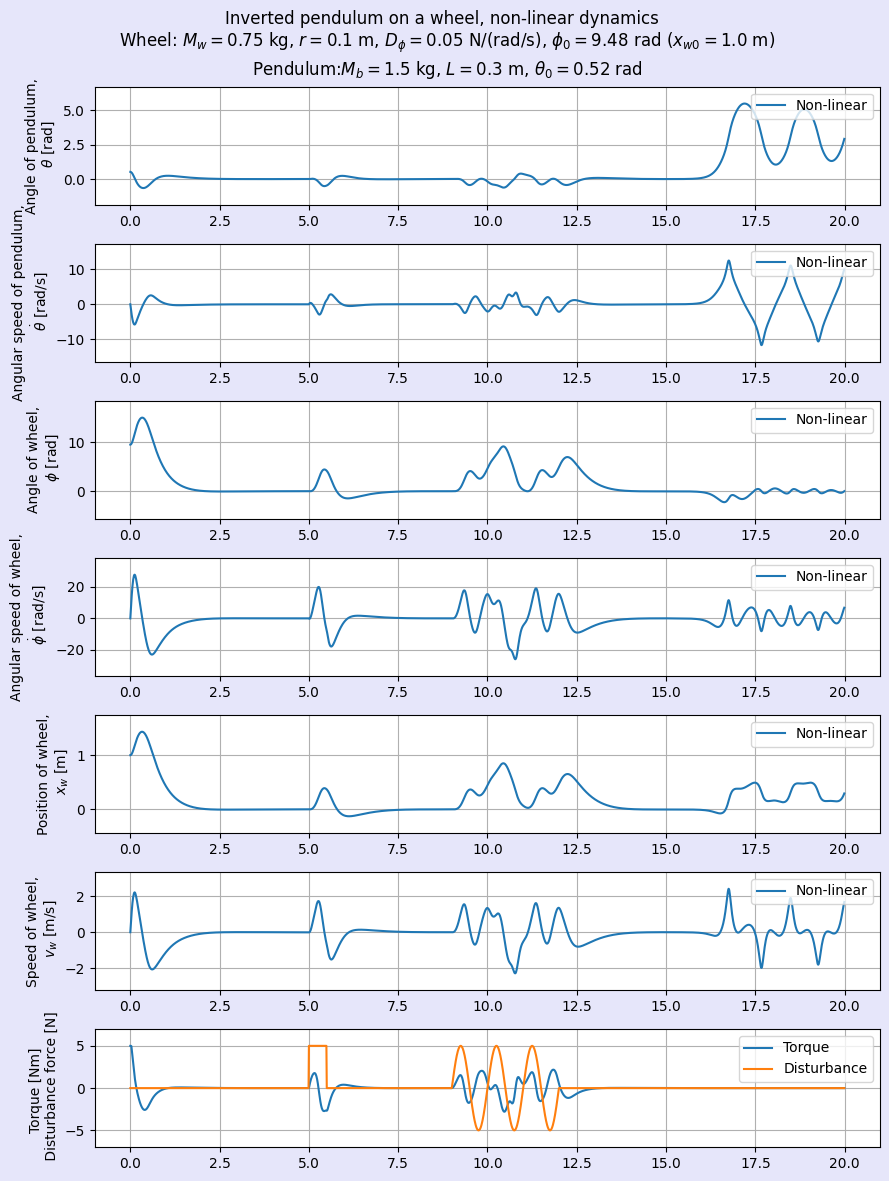

In [20]:
subtitle = f'Inverted pendulum on a wheel, non-linear dynamics \n \
Wheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), $\\phi_0 = {phi_0:.2f}$ rad ($x_{{w0}} = {r * (theta_0 + phi_0):.1f}$ m)\n \
Pendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {theta_0:.2f}$ rad'

data_list = [
             [(_theta,"Non-linear")],
             [(_theta_dot,"Non-linear")],
             [(_phi,"Non-linear")], 
             [(_phi_dot,"Non-linear")],
             [(_x_w,"Non-linear")],
             [(_v_w,"Non-linear")],
             [(_tau_cont,"Torque"),(_f_d,"Disturbance")]
             ]
labels_list = [
    'Angle of pendulum,\n $\\theta$ [rad]',
    'Angular speed of pendulum,\n $\\dot{\\theta}$ [rad/s]',
    'Angle of wheel,\n $\\phi$ [rad]',
    'Angular speed of wheel,\n $\\dot{\\phi}$ [rad/s]',
    'Position of wheel,\n $x_{w}$ [m]',
    'Speed of wheel,\n $v_{w}$ [m/s]',
    'Torque [Nm] \n Force [N]'
]

plot_time_domain(subtitle, _t, data_list, labels_list)

In [ ]:
# アニメーションの作成

# ヘルパー関数
def set_axis_properties(ax, x_range, y_range, xlabel, ylabel, title, grid=True):
   """Set common properties for an axis."""
   ax.set_xlim(x_range)
   ax.set_ylim(y_range)
   ax.set_xlabel(xlabel)
   ax.set_ylabel(ylabel)
   ax.set_title(title)
   ax.grid(grid)

# カラーマップ
cmap = plt.get_cmap("tab10")

# プロット
plt.rcParams["font.size"] = 11
fig, ax = plt.subplots(4, 1, figsize = (9, 9), gridspec_kw={'height_ratios': [2.5, 1, 1, 1]})
fig.patch.set_facecolor('lavender')

# 倒立振子レンダリング


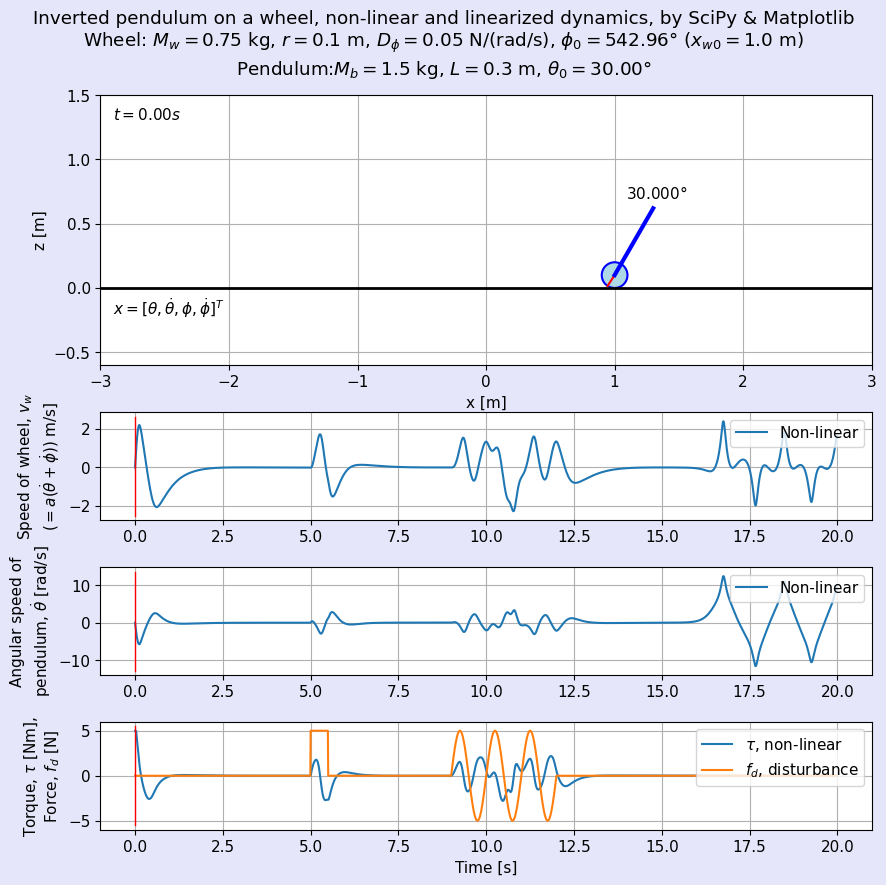

In [14]:
# ------------------------------------------------
# Animation theatre
# ------------------------------------------------

# Size of theatre
K_tscale = 3

# Alpha of linearized pendulum
alpha_lin = 0.4

# Color map
cmap = plt.get_cmap('tab10')

# Plot theatre
plt.rcParams["font.size"] = 11
fig, ax = plt.subplots(4, 1, figsize = (9, 9), gridspec_kw={'height_ratios': [2.5, 1, 1, 1]})
fig.patch.set_facecolor('lavender')
ax[0].set_aspect('equal')
fig.suptitle(f'Inverted pendulum on a wheel, non-linear and linearized dynamics, by SciPy & Matplotlib\nWheel: $M_w = {M_w}$ kg, $r = {r}$ m, $D_\\phi = {D_phi}$ N/(rad/s), $\\phi_0 = {np.degrees(phi_0):.2f}\degree$ ($x_{{w0}} = {r * (theta_0 + phi_0):.1f}$ m)\nPendulum:$M_b = {M_b}$ kg, $L = {L}$ m, $\\theta_0 = {np.degrees(theta_0):.2f}\degree$')

# Set axis for animation
ax[0].set_xlim(-K_tscale, K_tscale)
ax[0].set_xlabel('x [m]')
ax[0].set_ylim(-K_tscale / 5, K_tscale / 2)
ax[0].set_ylabel('z [m]')
ax[0].grid()
ax[0].set_axisbelow(True)

# Show state feedback gain
np.set_printoptions(formatter={'float': '{:.2f}'.format})
ax[0].text(-K_tscale + 0.1, -K_tscale / 20, '$x = [\\theta, \\dot{\\theta}, \phi, \\dot{\phi}]^T$', va = 'center')
# ax[0].text(-K_tscale + 0.1, -2 * K_tscale / 20, f'P control: $K_{{p}} = {30}$ Nm/rad', va = 'center')
# ax[0].text(-K_tscale + 0.1, -2 * K_tscale / 20, f'$F = ${F}', va = 'center')
# ax[0].text(-K_tscale + 0.1, -3 * K_tscale / 20, f'LQR: diag Q = {_Q.diagonal()}, R = {_R[0]}', va = 'center')

# Show time
text_time = ax[0].text(-K_tscale + 0.1, K_tscale / 2 - K_tscale / 20, f'$t = {_t[0]:.2f} s$', va = 'center')

# Draw floor
ax[0].plot([-10, 10], [0, 0], lw = 2, color = 'black')

# Draw wheel
# Original non-linear
wheel = patches.Circle(xy = (_x_w[0],r), radius =r, lw = 1.5, ec = 'blue', fc = 'lightblue')
ax[0].add_patch(wheel)
# wheel_lin = patches.Circle(xy = (_x_w_lin[0],r), radius =r, lw = 1.5, ec = 'blue', fc = 'lightblue', alpha = alpha_lin)
# ax[0].add_patch(wheel_lin)

# Draw wheel angle marker
line_angle, = ax[0].plot([_x_w[0], _x_w[0] +r * np.sin(_theta[0] + _phi[0])], \
    [r,r +r * np.cos(_theta[0] + _phi[0])], lw = 1.5, c = 'red')
# line_angle_lin, = ax[0].plot([_x_w_lin[0], _x_w_lin[0] +r * np.sin(_theta_lin[0] + _phi_lin[0])], \
#     [r,r +r * np.cos(_theta_lin[0] + _phi_lin[0])], lw = 1.5, c = 'red', alpha = alpha_lin)

# Draw pendulum
# Original non-linear
pendulum, = ax[0].plot([_x_w[0], _x_w[0] + 2 *L * np.sin(_theta[0])], [r,r + 2 *L * np.cos(_theta[0])], \
    lw = 3, color = 'blue')
# pendulum_lin, = ax[0].plot([_x_w_lin[0], _x_w_lin[0] + 2 *L * np.sin(_theta_lin[0])], [r,r + 2 *L * np.cos(_theta_lin[0])], \
#     lw = 3, color = 'blue', alpha = alpha_lin)

# Show angle of pendulum over it
# Original non-linear
text_angle = ax[0].text(_x_w[0] + 2 *L * 1.1 * np.sin(_theta[0]), \
   r + 2 *L * 1.1 * np.cos(_theta[0]), \
    f'${np.degrees(_theta[0]):.3f}\degree$', ha = 'center', va = 'bottom')
# text_angle_lin = ax[0].text(_x_w_lin[0] + 2 *L * 1.1 * np.sin(_theta_lin[0]), \
#    r + 2 *L * 1.1 * np.cos(_theta_lin[0]), \
#     f'${np.degrees(_theta_lin[0]):.3f}\degree$', ha = 'center', va = 'bottom', alpha = alpha_lin)

# Show control and disturbance forces as arrows
K_fscale = K_tscale / 20

# # Original non-linear
# arrow_cont = ax[0].arrow(x_c[0] - w_cart / 2 * np.sign(f_cont[0]) - K_fscale * f_cont[0], \
#     h_cart / 2, K_fscale * f_cont[0], 0, length_includes_head = True, \
#     width = K_tscale * 0.01, color = 'blue', alpha = 0.6)

arrow_disturb = ax[0].arrow(_x_w[0] + 2 *L * np.sin(_theta[0]) - K_fscale * _f_d[0],r + 2 * L * np.cos(_theta[0]), \
    K_fscale * _f_d[0], 0, length_includes_head = True, \
    width = K_tscale * 0.01, color = cmap(2), alpha = 0.8)
# arrow_disturb_lin = ax[0].arrow(_x_w_lin[0] + 2 *L * np.sin(_theta_lin[0]) - K_fscale * _f_d_lin[0],r + 2 *L * np.cos(_theta_lin[0]), \
#     K_fscale * _f_d_lin[0], 0, length_includes_head = True, \
#     width = K_tscale * 0.01, color = cmap(2), alpha = alpha_lin * 0.8)

# Time-domain plots
# Plot speed of cart
ax[1].plot(_t, _v_w, label = 'Non-linear', ls = '-')
# ax[1].plot(_t, _v_w_lin, label = 'Linearized', ls = '--')
line_time_v_w, = ax[1].plot([_t[0], _t[0]], ax[1].get_ylim(), lw = 1, c = 'red') 
ax[1].set_ylim(np.min(_v_w) * 1.2, np.max(_v_w) * 1.2)
ax[1].set_ylabel('Speed of wheel, $v_{w}$\n$(= a (\dot{\\theta} + \dot{\phi}))$ m/s]')
ax[1].legend(loc = 'upper right')
ax[1].grid()

# Plot angular speed of pendulum
ax[2].plot(_t, _theta_dot, label = 'Non-linear', ls = '-')
# ax[2].plot(_t, _theta_dot_lin, label = 'Linearized', ls = '--')
line_time_omega_p, = ax[2].plot([_t[0], _t[0]], ax[2].get_ylim(), lw = 1, c = 'red')
ax[2].set_ylim(np.min(_theta_dot) * 1.2, np.max(_theta_dot) * 1.2)
ax[2].set_ylabel('Angular speed of\npendulum, $\dot{\\theta}$ [rad/s]')
ax[2].legend(loc = 'upper right')
ax[2].grid()

# # Plot torque
ax[3].plot(_t, _tau_cont, label = '$\\tau$, non-linear', ls = '-')
# ax[3].plot(_t, _tau_cont_lin, label = '$\\tau$, linearized', ls = '--')
ax[3].plot(_t, _f_d, label = '$f_{d}$, disturbance')
line_time_torque, = ax[3].plot([_t[0], _t[0]], ax[3].get_ylim(), lw = 1, c = 'red')
ax[3].set_ylim(np.min([_tau_cont, _f_d]) * 1.2, np.max([_tau_cont, _f_d]) * 1.2)
ax[3].set_xlabel('Time [s]')
ax[3].set_ylabel('Torque, $\\tau$ [Nm],\nForce, $f_{d}$ [N]')
ax[3].legend(loc = 'upper right')
ax[3].grid()

fig.tight_layout()

In [15]:
# ------------------------------------------------
# Frame update function
# ------------------------------------------------
def update_frame(i):
    # Update wheel position
    wheel.center = (_x_w[i], r)
   #  wheel_lin.center = (_x_w_lin[i],r)
    
    # Update wheel angle marker
    line_angle.set_data([_x_w[i], _x_w[i] +r * np.sin(_theta[i] + _phi[i])], [r,r +r * np.cos(_theta[i] + _phi[i])])
    # line_angle_lin.set_data([_x_w_lin[i], _x_w_lin[i] +r * np.sin(_theta_lin[i] + _phi_lin[i])], [r,r +r * np.cos(_theta_lin[i] + _phi_lin[i])])
        
    # Update pendulum attitude
    pendulum.set_data([_x_w[i], _x_w[i] + 2 *L * np.sin(_theta[i])],[r,r + 2 *L * np.cos(_theta[i])])
    # pendulum_lin.set_data([_x_w_lin[i], _x_w_lin[i] + 2 *L * np.sin(_theta_lin[i])],[r,r + 2 *L * np.cos(_theta_lin[i])])
    
    # Update pendulum angle text
    text_angle.set_position((_x_w[i] + 2 *L * 1.1 * np.sin(_theta[i]),r + 2 *L * 1.1 * np.cos(_theta[i])))
    text_angle.set_text(f'${np.degrees(_theta[i]):.3f}\degree$')
    # text_angle_lin.set_position((_x_w_lin[i] + 2 *L * 1.1 * np.sin(_theta_lin[i]),r + 2 *L * 1.1 * np.cos(_theta_lin[i])))
    # text_angle_lin.set_text(f'${np.degrees(_theta_lin[i]):.3f}\degree$')
  
    # Update time text
    text_time.set_text(f'$t = {_t[i]:.2f}$ s')
    
    # Update force arrow
    kwargs = {'x': _x_w[i] + 2 *L * np.sin(_theta[i]) - K_fscale * _f_d[i], 'y':r + 2 *L * np.cos(_theta[i]), 'dx': K_fscale * _f_d[i]}
    arrow_disturb.set_data(**kwargs)
    # kwargs = {'x': _x_w_lin[i] + 2 *L * np.sin(_theta_lin[i]) - K_fscale * _f_d_lin[i], 'y':r + 2 *L * np.cos(_theta_lin[i]), 'dx': K_fscale * _f_d_lin[i]}
    # arrow_disturb_lin.set_data(**kwargs)
   
    # Update time lines
    line_time_v_w.set_data([_t[i], _t[i]], ax[1].get_ylim())
    line_time_omega_p.set_data([_t[i], _t[i]], ax[2].get_ylim())
    line_time_torque.set_data([_t[i], _t[i]], ax[3].get_ylim())
    
    return (wheel, line_angle, pendulum, text_angle, text_time, line_time_v_w, line_time_omega_p, line_time_torque)

In [16]:
# ------------------------------------------------
# Definition and creation of animation as HTML5
# ------------------------------------------------
ani = animation.FuncAnimation(fig, update_frame, \
    frames = np.arange(0, len(_t), 5), interval = dt * 5 * 1000, blit = True)

# Show animation as HTML5 video
HTML(ani.to_html5_video())

In [17]:
# ------------------------------------------------
# Save animation as GIF
# ------------------------------------------------

file = 'inverted-pendulum-on-wheel.gif'

# Save animation GIF
ani.save(file)

## 駆動系の動特性の導出

### モーターの動特性の導出
モーターの内部は以下のようにモデル化できる。

$$
\begin{aligned}
v &= R_M i  + L \frac{di}{dt} + K_e \dot{\phi}_M  \\
\tau_M &= K_T i 
\end{aligned}
$$
今回、$L_M \ll R_M$ を踏まえてインダクタンスを無視する。
すると、モータによって生じるトルク$\tau_M$は、
$$
\begin{aligned}
\tau_M &= K_T i \\
&= \frac{K_T}{R_M} (v -  K_e \dot{\phi}_M )\\
\end{aligned}
$$
となる。
ここで、モーターで$R_M$以外でのエネルギー損失がないとすると、
$$
\begin{aligned}
\tau_M \dot{\phi}_M &= e i\\
K_T i \dot{\phi}_M&= K_e \dot{\phi}_M i \\
\therefore K_T &= K_e \\
\end{aligned}
$$
となる。したがって、$K=K_e=K_T$として、モータによって生じるトルク$\tau_M$は、
$$
\tau_M = \frac{K}{R_M} (v -  K \dot{\phi}_M) 
$$
となる。

### 駆動系の動特性の導出
実際の駆動系は以下の図のようになっている。よって駆動系の角運動方程式は、
減速比を$n$とすると、
$$
\begin{aligned}
J_M \ddot{\phi}_M &= \tau_M - \frac{\tau}{n}\\
\end{aligned}
$$
となる。前節の結果を踏まえ、$\phi_M = n\phi$に注意すると、モーターに電圧$v$を印加したときにタイヤに生じるトルク$\tau$は、
$$
\begin{aligned}
\tau &= n\left(\tau_M - J_M \ddot{\phi}_M\right) \\
&= \frac{nK}{R_M} v -  n^2\left(\frac{K^2}{R_M} \dot{\phi} + J_M \ddot{\phi}\right) \\
\end{aligned}
$$
となる。

## システム全体の状態方程式の導出

以上の結果を再掲すると、システム全体の状態方程式は、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &= \begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\frac{1}{ab - c^2 \cos^2 \theta }\begin{bmatrix} a & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix}\tau_\theta +  (c \dot{\theta}^2 + d)\sin \theta \\ \tau_\phi + c \dot{\theta}^2\sin \theta - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\tau_\theta &= f_d (r +  l \cos \theta) \\
\tau_\phi &= \tau + f_d r \\
\tau &= \frac{nK}{R_M} v -  n^2\left(\frac{K^2}{R_M} \dot{\phi} + J_M \ddot{\phi}\right) \\
\end{aligned}
$$
なる。

## 観測方程式の導出
観測できる情報は、車体の角速度$\dot{\theta}$（and 設定によっては車輪の角度$\phi$）である。このときの観測方程式は、
$$
\begin{aligned}
\bm{y} &= \begin{bmatrix}0 & 0 &1 &0\end{bmatrix}\begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi} \end{bmatrix} \\
 & \left(=\begin{bmatrix}0 & 1 &0 &0 \\ 0 & 0 &1 &0\end{bmatrix}\begin{bmatrix}\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi} \end{bmatrix}  \right)\\
\end{aligned}
$$
となる。

## 線形状態空間モデルの導出


### 状態方程式の線形化
$|\theta| \ll 1$として、$\sin \theta \approx \theta,\; \cos \theta \approx 1$と近似することで状態方程式を線形化する。
上記の近似により、状態方程式は、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\frac{1}{ab - c^2 \cos^2 \theta }\begin{bmatrix} a & -(a + c \cos \theta) \\  -(a + c \cos \theta) & a + b + 2c\cos\theta  \end{bmatrix}\begin{bmatrix}\tau_\theta +  (c \dot{\theta}^2 + d)\sin \theta \\ \tau_\phi + c \dot{\theta}^2\sin \theta - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
&\approx\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\frac{1}{ab - c^2  }\begin{bmatrix} a & -(a + c) \\  -(a + c) & a + b + 2c \end{bmatrix}\begin{bmatrix}\tau_\theta +  (c \dot{\theta}^2 + d)\theta \\ \tau_\phi + c \dot{\theta}^2\theta - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\tau_\theta &= f_d (r +  l \cos \theta) \approx f_d (r +  l) \\
\tau_\phi &= \tau + f_d r \\
\tau &= \frac{nK}{R_M} v -  n^2\left(\frac{K^2}{R_M} \dot{\phi} + J_M \ddot{\phi}\right) \\
\end{aligned}
$$
となる。さらに微小量$\theta,\; \dot{\theta}$の2次以上の項を無視すると、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &\approx\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\frac{1}{ab - c^2  }\begin{bmatrix} a & -(a + c) \\  -(a + c) & a + b + 2c \end{bmatrix}\begin{bmatrix}\tau_\theta + d \theta \\ \tau_\phi - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\tau_\theta & \approx f_d (r +  l) \\
\tau_\phi &= \tau + f_d r \\
\tau &= \frac{nK}{R_M} v -  n^2\left(\frac{K^2}{R_M} \dot{\phi} + J_M \ddot{\phi}\right) \\
\end{aligned}
$$
となる。以上の状態方程式を１つの行列表現になるようにまとめると、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\frac{1}{ab - c^2  }\begin{bmatrix} a & -(a + c) \\  -(a + c) & a + b + 2c \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ \frac{nK}{R_M} v -  n^2\left(\frac{K^2}{R_M} \dot{\phi} + J_M \ddot{\phi}\right) +f_dr - D_\phi \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$
となる。右辺に$\ddot{\phi}$があるので、これ左辺に持っていくように更に整理すると、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\frac{1}{ab +(a + b + 2c)n^2J_M- c^2  }\begin{bmatrix} a+n^2J_M & -(a + c) \\  -(a + c) & a + b + 2c \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ \frac{nK}{R_M} v +f_dr - ( D_\phi + \frac{n^2K^2}{R_M} ) \dot{\phi}  \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$
を得る。ここで、定数をまとめるため、
$$
\begin{aligned}
E &= a + n^2 J_M \\
F &= a + c \\
G &= a + b + 2c \\
H &= D_\phi + \frac{n^2K^2}{R_M} \\
\Delta &= EG - F^2= ab +(a + b + 2c)n^2J_M- c^2 \\ 
\end{aligned}
$$
とおくと、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\Delta^{-1}\begin{bmatrix} E & -F \\  -F & G \end{bmatrix}\begin{bmatrix}f_d (r +  l) + d \theta \\ \frac{nK}{R_M} v +f_dr - H\dot{\phi}  \end{bmatrix} \end{bmatrix} =\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ 
\Delta^{-1}\begin{bmatrix} E\left(f_d (r +  l) + d \theta \right)-F\left(\frac{nK}{R_M} v +f_dr - H\dot{\phi}\right) \\  -F\left(f_d (r +  l) + d \theta \right) + G\left(\frac{nK}{R_M} v +f_dr - H\dot{\phi}\right) \end{bmatrix} \end{bmatrix} \\
\end{aligned}
$$
となる。これを標準的な状態空間表現に変形していくと、
$$
\begin{aligned}
\begin{bmatrix} \dot{\theta} \\ \dot{\phi} \\ \ddot{\theta} \\ \ddot{\phi}\end{bmatrix} &=
\begin{bmatrix} 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 \\
\Delta^{-1}Ed & 0 & 0 & \Delta^{-1}FH \\
-\Delta^{-1}Fd & 0 & 0 & -\Delta^{-1}GH
\end{bmatrix}
\begin{bmatrix}
\theta \\ \phi \\ \dot{\theta} \\ \dot{\phi}
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\
0 & 0 \\
-\Delta^{-1}\frac{nKF}{R_M}  & \Delta^{-1}\left(E(r + l)-Fr\right) \\
\Delta^{-1}\frac{nKG}{R_M}  & \Delta^{-1}\left(-F(r+l)+Gr\right) \\
\end{bmatrix}
\begin{bmatrix}
v \\ f_d
\end{bmatrix}
\end{aligned}
$$
となる。

# 制御器(LQG)の設計

## システムの可制御性・可観測性の確認

In [10]:
E,F,G,H = -4, -6,7,3
I,J = 5,-2

A = np.array([[0,0,1,0],[0,0,0,1],[0,E,F,0],[0,G,H,0]])
B = np.array([[0],[0],[I],[J]])
C = np.array([[0,1,0,0],[0,0,1,0]])

# 可制御性行列
U_c = np.hstack([B, A@B, A@A@B, A@A@A@B])
print("rank U_c:",np.linalg.matrix_rank(U_c))

# 可観測性行列
U_o = np.vstack([C, C@A, C@A@A, C@A@A@A])
print(U_o)
print("rank U_o:",np.linalg.matrix_rank(U_o))

# 位置をダイナミクスから除いた場合
A_wo_x = np.array([[0,0,1],[E,F,0],[G,H,0]])
B_wo_x = np.array([[0],[I],[J]])
C_wo_x = np.array([[0,0,1]])

# 可制御性行列
U_c_wo_x = np.hstack([B_wo_x, A_wo_x@B_wo_x, A_wo_x@A_wo_x@B_wo_x])
print("rank U_c_wo_x:",np.linalg.matrix_rank(U_c_wo_x))
# 可観測性行列
U_o_wo_x = np.vstack([C_wo_x, C_wo_x@A_wo_x, C_wo_x@A_wo_x@A_wo_x])
print("rank U_o_wo_x:",np.linalg.matrix_rank(U_o_wo_x))

rank U_c: 4
[[   0    1    0    0]
 [   0    0    1    0]
 [   0    0    0    1]
 [   0   -4   -6    0]
 [   0    7    3    0]
 [   0   24   36   -4]
 [   0  -12  -18    7]
 [   0 -172 -228   24]]
rank U_o: 3
rank U_c_wo_x: 3
rank U_o_wo_x: 3


## カルマンフィルタの設計

## 状態フィードバックの設計


## LQG制御器の設計

# シミュレーション

# 実機のシステム同定